# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #FDD20E; text-align: center; line-height: 0.75;background-color: #F93822"><b>Heart Failure Prediction</b><br></h1>



### <center>Dataset Attributes</center>
    
- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


### Data Info :

In [ ]:
data.shape

(918, 12)

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


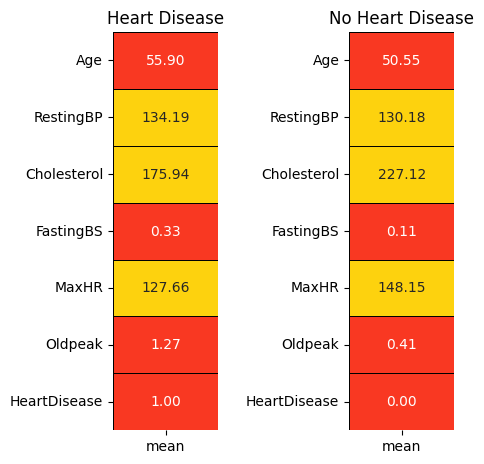

In [ ]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

- **Mean** values of all the features for cases of heart diseases and non-heart diseases.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividing features into Numerical and Categorical :

In [ ]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature

- For this dataset, as the number of features are less, we can manually check the dataset as well.

### Categorical Features :

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [ ]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.00,2,0
1,49,0,2,160,180,0,1,156,0,1.00,1,1
2,37,1,1,130,283,0,2,98,0,0.00,2,0
3,48,0,0,138,214,0,1,108,1,1.50,1,1
4,54,1,2,150,195,0,1,122,0,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.20,1,1
914,68,1,0,144,193,1,1,141,0,3.40,1,1
915,57,1,0,130,131,0,1,115,1,1.20,1,1
916,57,0,1,130,236,0,0,174,0,0.00,1,1


- Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.
- Modifications in the original dataset will not be highlighted in this deep copy.
- Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.

#### Distribution of Categorical Features :

### Numerical Features :

#### Distribution of Numerical Features :

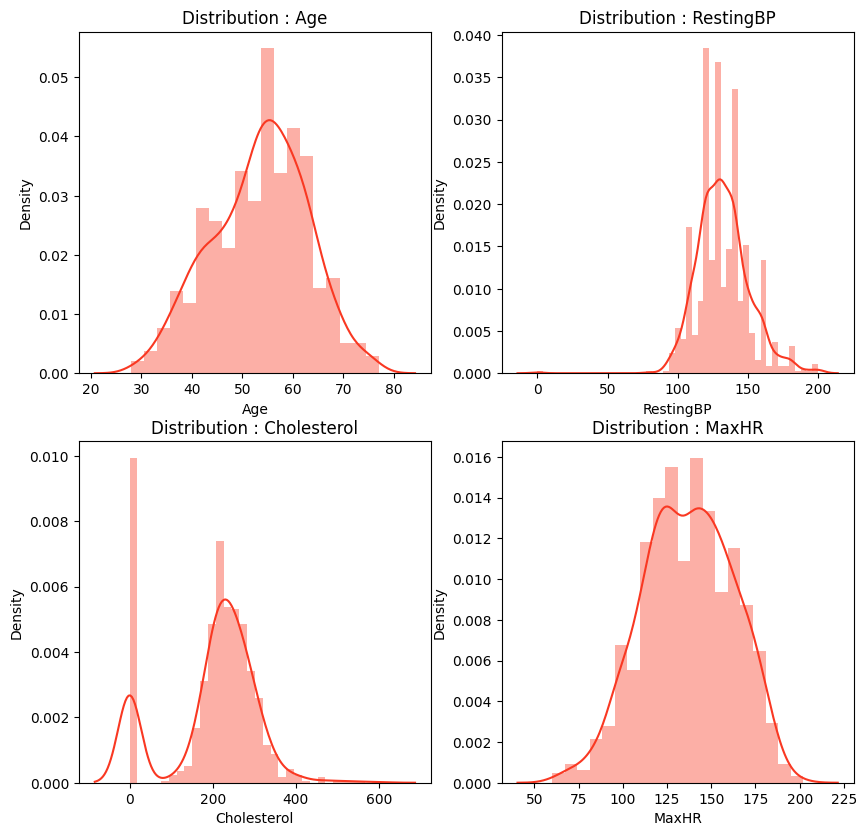

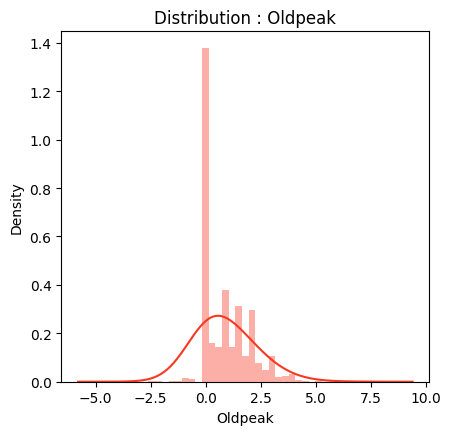

In [ ]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
colors = ['#F93822','#FDD20E']
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

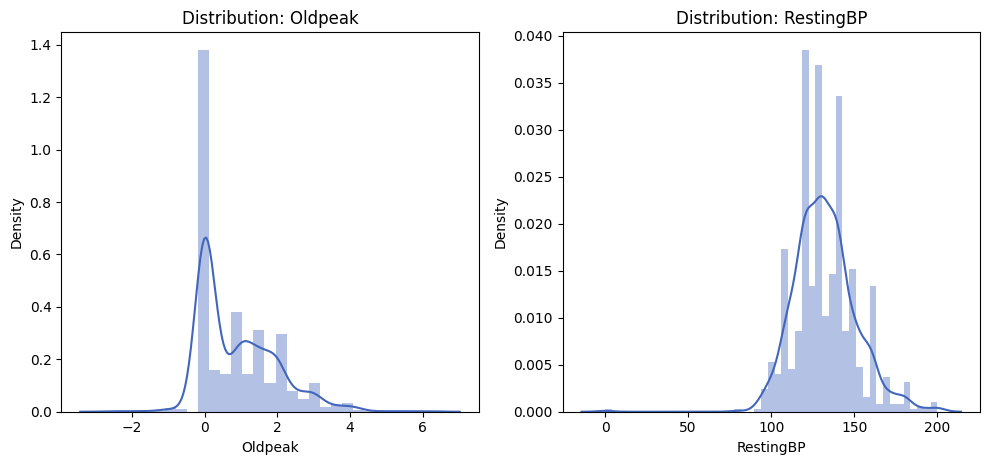

In [ ]:
numerical_feats=['Oldpeak','RestingBP']
# Create a 1x2 grid for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4.75))

# Set colors for the plots
colors = ['#4166BC', '#4166BC']

# Plot the distributions for each feature
for i in range(len(numerical_feats)):
    sns.distplot(data[numerical_feats[i]], color=colors[i], ax=axes[i])
    title = 'Distribution: ' + numerical_feats[i]
    axes[i].set_title(title)

# Adjust layout
plt.tight_layout()
plt.show()

- **Oldpeak's** data distribution is rightly skewed.
- **Cholestrol** has a bidmodal data distribution.

### Numerical Features vs Target Variable (HeartDisease) :

- From the **RestingBP** group data, **95** (19x5) - **170** (34x5) readings are most prone to be detected with heart diseases.
- **Cholesterol** levels between **160** (16x10) - **340** (34x10) are highly susceptible to heart diseases.
- For the **MaxHR** readings, heart diseases are found throughout the data but **70** (14x5) - **180** (36x5) values has detected many cases.
- **Oldpeak** values also display heart diseases throughout. **0** (0x5/10) - **4** (8x5/10) slope values display high probability to be diagnosed with heart diseases.

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

#### Sex vs Numerical Features :

- **Male** population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- **Female** population data points are very less as compared to **male** population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases.

#### ST_Slope vs Numerical Features :

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

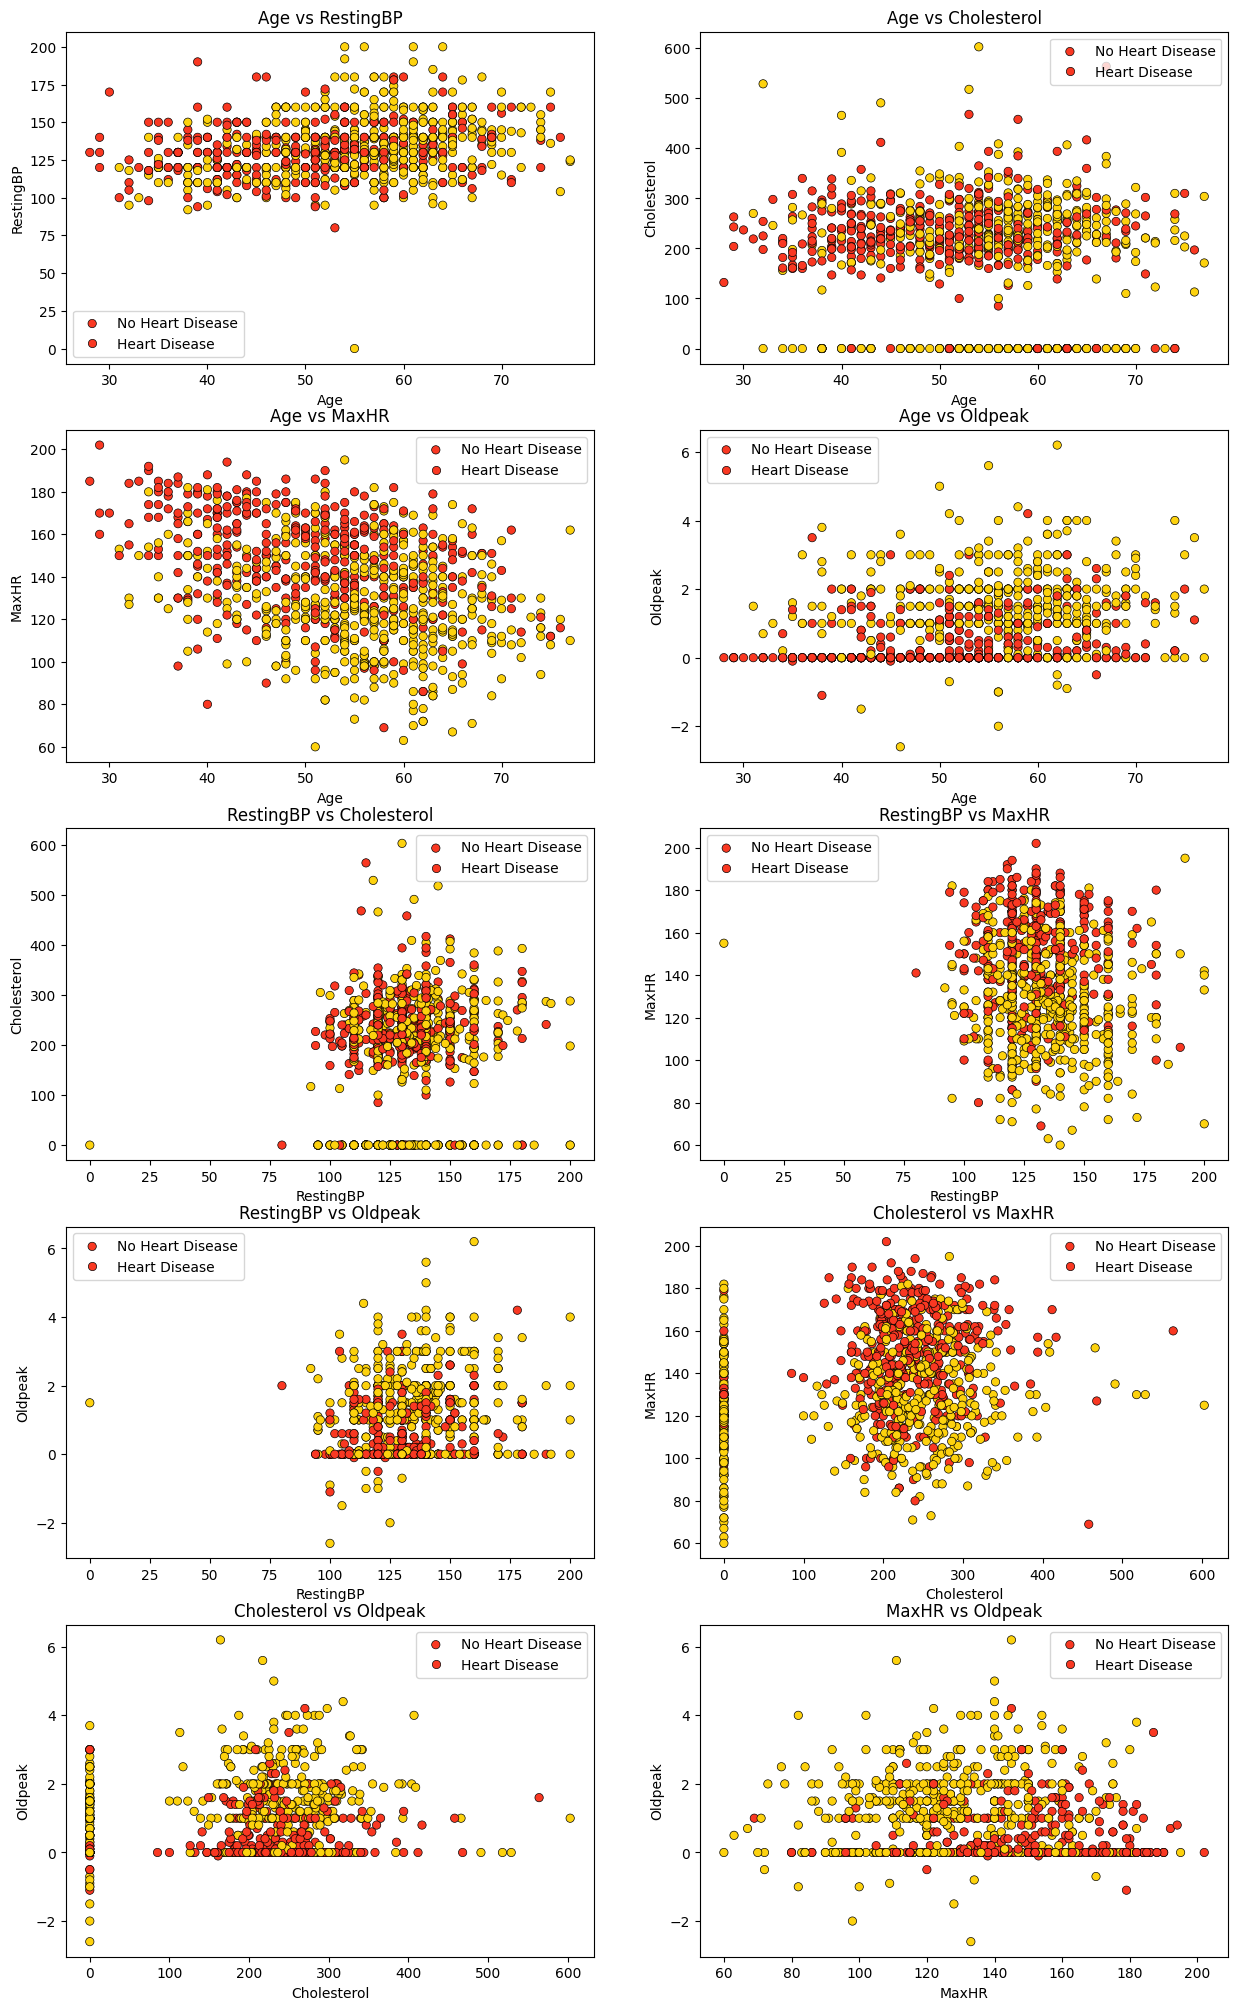

In [ ]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For **age** 50+, **RestingBP** between 100 - 175, **Cholesterol** level of 200 - 300,**Max Heart Rate** below 160 and positive **oldpeak** values displays high cases of heart disease.
- For **RestingBP** values 100 - 175, highlights too many heart disease patients for all the features.
- **Cholesterol** values 200 - 300 dominates the heart disease cases.
- Similarly, **Max Heart Rate** values below 140 has high probability of being diagnosed with heart diseases.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for positive cases of heart disease :

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down

- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    


# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Data Scaling :

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

def robust_scale_feature(data, feature_name):
    # Ensure the feature exists in the data
    if feature_name not in data.columns:
        print(f"Error: {feature_name} not found in the dataset.")
        return None

    # Extract the feature to be scaled
    feature_data = data[[feature_name]]

    # Initialize the RobustScaler
    scaler = RobustScaler()

    # Fit and transform the data using RobustScaler
    scaled_data = scaler.fit_transform(feature_data)

    # Replace the original feature with the scaled feature in the DataFrame
    data[feature_name] = scaled_data

    return data

# Example usage:
# Assuming you have a pandas DataFrame called 'df' with a column named 'your_feature'
# Replace 'your_feature' with the actual feature name in your dataset
# The function modifies the original DataFrame in-place
df2 = robust_scale_feature(df1, 'Oldpeak')
df2 = robust_scale_feature(df1, 'RestingBP')
# Display the DataFrame with the original feature replaced by the scaled feature
print(df2.head())


   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1       0.50          289          0           1   
1   49    0              2       1.50          180          0           1   
2   37    1              1       0.00          283          0           2   
3   48    0              0       0.40          214          0           1   
4   54    1              2       1.00          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0    -0.40         2             0  
1    156               0     0.27         1             1  
2     98               0    -0.40         2             0  
3    108               1     0.60         1             1  
4    122               0    -0.40         2             0  


In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df2['Age'] = ss.fit_transform(df2[['Age']])
#df1['RestingBP'] = mms.fit_transform(df1[['RestingBP']])
df2['Cholesterol'] = ss.fit_transform(df2[['Cholesterol']])
df2['MaxHR'] = ss.fit_transform(df2[['MaxHR']])
#df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.50,0.83,0,1,1.38,0,-0.40,2,0
1,-0.48,0,2,1.50,-0.17,0,1,0.75,0,0.27,1,1
2,-1.75,1,1,0.00,0.77,0,2,-1.53,0,-0.40,2,0
3,-0.58,0,0,0.40,0.14,0,1,-1.13,1,0.60,1,1
4,0.05,1,2,1.00,-0.03,0,1,-0.58,0,-0.40,2,0


In [ ]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.50,0.83,0,1,1.38,0,-0.40,2,0
1,-0.48,0,2,1.50,-0.17,0,1,0.75,0,0.27,1,1
2,-1.75,1,1,0.00,0.77,0,2,-1.53,0,-0.40,2,0
3,-0.58,0,0,0.40,0.14,0,1,-1.13,1,0.60,1,1
4,0.05,1,2,1.00,-0.03,0,1,-0.58,0,-0.40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.90,1,3,-1.00,0.60,0,1,-0.19,0,0.40,1,1
914,1.54,1,0,0.70,-0.05,1,1,0.16,0,1.87,1,1
915,0.37,1,0,0.00,-0.62,0,1,-0.86,1,0.40,1,1
916,0.37,0,1,0.00,0.34,0,0,1.46,0,-0.40,1,1


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

### Correlation Matrix :

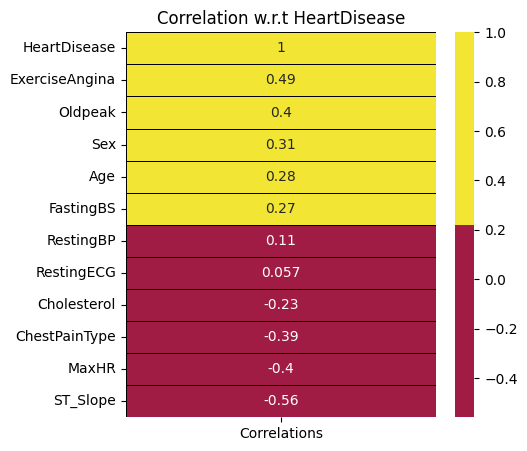

In [ ]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
colors = ['#A11C44','#F2E534']
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features :

#### Chi Squared Test :

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
df1.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.50,0.83,0,1,1.38,0,-0.40,2,0
1,-0.48,0,2,1.50,-0.17,0,1,0.75,0,0.27,1,1
2,-1.75,1,1,0.00,0.77,0,2,-1.53,0,-0.40,2,0
3,-0.58,0,0,0.40,0.14,0,1,-1.13,1,0.60,1,1
4,0.05,1,2,1.00,-0.03,0,1,-0.58,0,-0.40,2,0


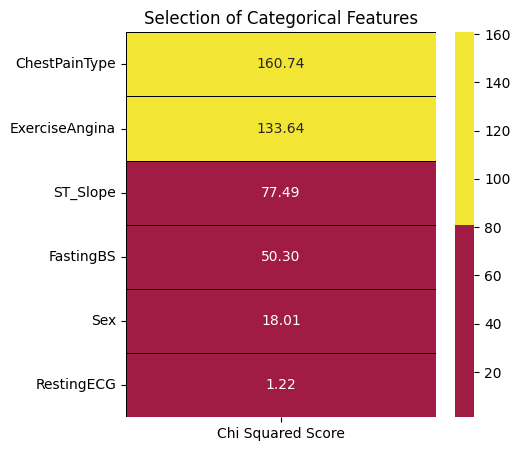

In [ ]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- Except **RestingECG**, all the remaining categorical features are pretty important for predicting heart diseases.

### Feature Selection for Numerical Features :

#### ANOVA Test :

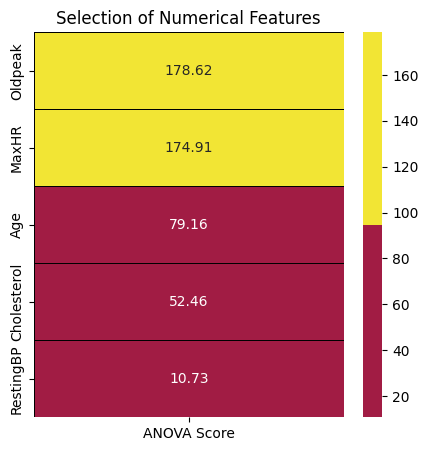

In [ ]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- We will leave out **RestingBP** from the modeling part and take the remaining features.

# <center><div style="font-family: Trebuchet MS; background-color: #F93822; color: #FDD20E; padding: 12px; line-height: 1;">Modeling</div></center>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
features = df2[df2.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df2['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [ ]:
def model(classifier):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    #plot_roc_curve(classifier, x_test,y_test)
    #plt.title('ROC_AUC_Plot')
    #plt.show()

def model_evaluation(classifier):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X is feature matrix and y is your target variable
# Replace X and y with actual feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the test set
y_pred = best_estimator.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy}")

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Test Accuracy: 0.4963768115942029


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

Learning rate set to 0.008526
0:	learn: 0.6860347	total: 870us	remaining: 870ms
1:	learn: 0.6774969	total: 2.31ms	remaining: 1.15s
2:	learn: 0.6700116	total: 3.63ms	remaining: 1.21s
3:	learn: 0.6623534	total: 4.68ms	remaining: 1.16s
4:	learn: 0.6556769	total: 5.84ms	remaining: 1.16s
5:	learn: 0.6484165	total: 7.21ms	remaining: 1.19s
6:	learn: 0.6432714	total: 8.26ms	remaining: 1.17s
7:	learn: 0.6362833	total: 9.5ms	remaining: 1.18s
8:	learn: 0.6320041	total: 10.5ms	remaining: 1.15s
9:	learn: 0.6259919	total: 11.7ms	remaining: 1.16s
10:	learn: 0.6196517	total: 12.7ms	remaining: 1.15s
11:	learn: 0.6134473	total: 13.9ms	remaining: 1.14s
12:	learn: 0.6078947	total: 15.1ms	remaining: 1.14s
13:	learn: 0.6012767	total: 16.4ms	remaining: 1.16s
14:	learn: 0.5962285	total: 17.6ms	remaining: 1.15s
15:	learn: 0.5904283	total: 19.1ms	remaining: 1.18s
16:	learn: 0.5846297	total: 20.3ms	remaining: 1.17s
17:	learn: 0.5796216	total: 22.1ms	remaining: 1.2s
18:	learn: 0.5744009	total: 23.2ms	remaining: 1

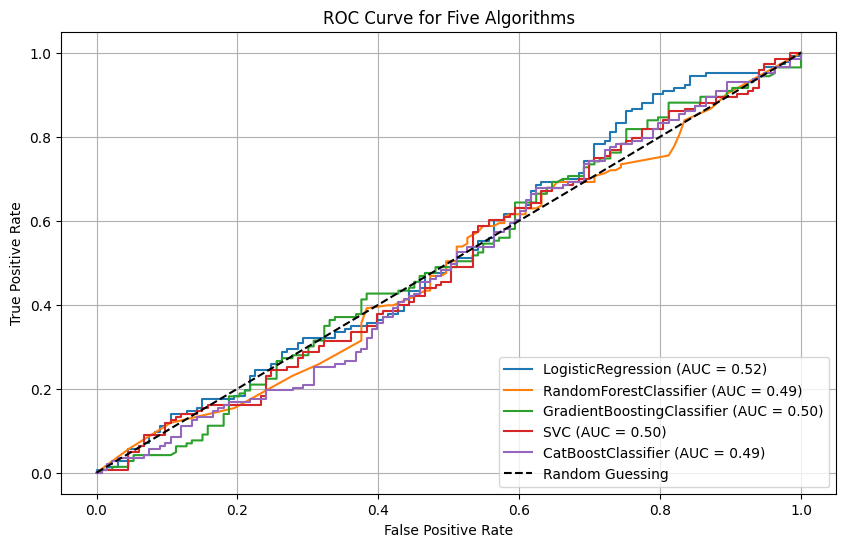

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define classifiers
classifiers = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(probability=True, random_state=42),
    CatBoostClassifier()
]

# Train and evaluate each classifier
plt.figure(figsize=(10, 6))

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(classifier).__name__} (AUC = {roc_auc:.2f})')

# Plot ROC curve for random guessing (dashed diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot properties
plt.title('ROC Curve for Five Algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### 1] Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

In [ ]:
model(classifier_lr)

Accuracy :  58.70%
Cross Validation Score :  54.59%
ROC_AUC Score :  56.33%


              precision    recall  f1-score   support

           0       0.87      0.84      0.85       133
           1       0.86      0.88      0.87       143

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



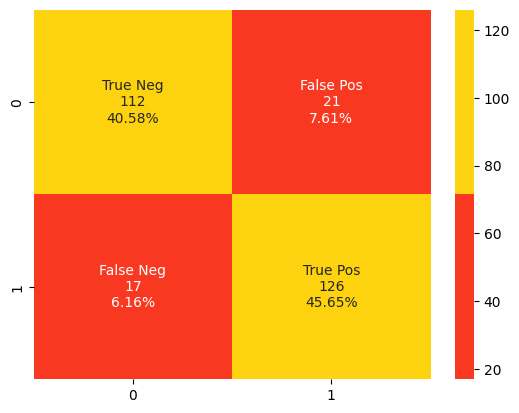

In [ ]:
model_evaluation(classifier_lr)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

2. LDA

In [ ]:
lda1=LinearDiscriminantAnalysis()

model(lda1)

Accuracy :  86.96%
Cross Validation Score :  91.05%
ROC_AUC Score :  86.94%


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       133
           1       0.87      0.87      0.87       143

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



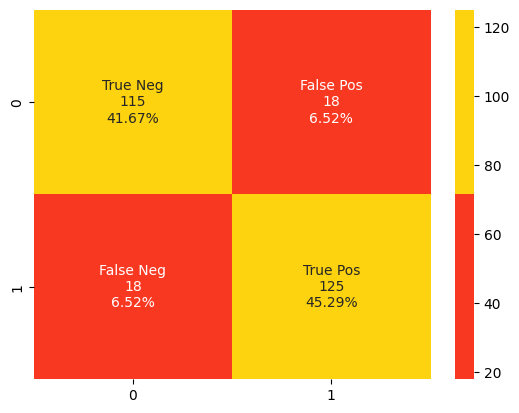

In [ ]:
model_evaluation(lda1)

#### 3] Support Vector Classifier :

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

In [ ]:
model(classifier_svc)

Accuracy :  85.51%
Cross Validation Score :  90.29%
ROC_AUC Score :  85.46%


              precision    recall  f1-score   support

           0       0.83      0.80      0.81       133
           1       0.82      0.85      0.83       143

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



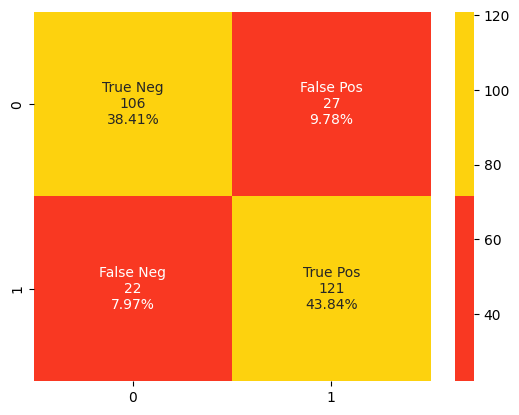

In [ ]:
model_evaluation(classifier_svc)

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=746aba5fff49ebd1fd768c8d9c278649deacdfc2a0eec98d05b7afd4b60767b1
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:

#X = df1[features]
#y = df1['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.3, random_state=seed)

#### 3] Gradient Boost :

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
classifier_gb = GradientBoostingClassifier()

In [ ]:
model(classifier_gb)

Accuracy :  85.51%
Cross Validation Score :  91.87%
ROC_AUC Score :  85.38%


              precision    recall  f1-score   support

           0       0.87      0.82      0.84       133
           1       0.84      0.89      0.86       143

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



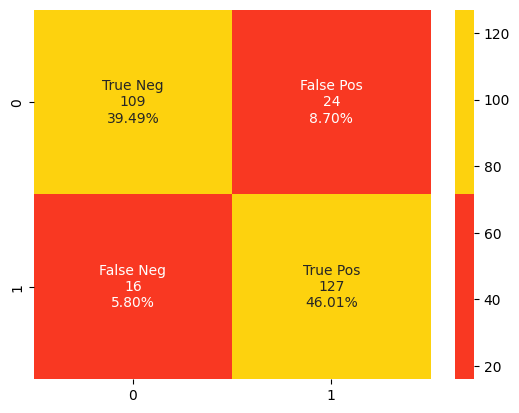

In [ ]:
model_evaluation(classifier_gb)

#### 4] Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 10,random_state = 0)

In [ ]:
model(classifier_rf)

Accuracy :  84.42%
Cross Validation Score :  92.71%
ROC_AUC Score :  84.26%


              precision    recall  f1-score   support

           0       0.89      0.77      0.82       133
           1       0.81      0.91      0.86       143

    accuracy                           0.84       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



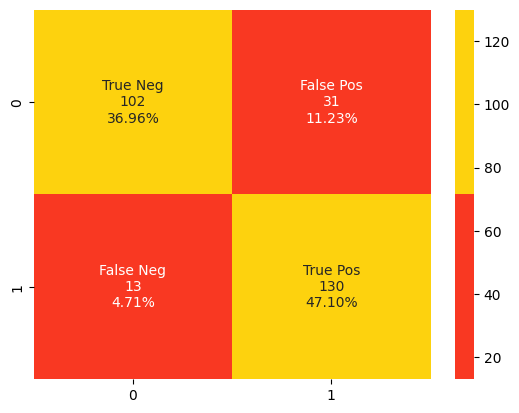

In [ ]:
model_evaluation(classifier_rf)

#### 5] K-nearest Neighbors Classifier :

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
cat = CatBoostClassifier()

In [ ]:
model(cat)

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6448659	total: 8.97ms	remaining: 1.27s
7:	learn: 0.6384787	total: 10.2ms	remaining: 1.27s
8:	learn: 0.6341243	total: 11.3ms	remaining: 1.25s
9:	learn: 0.6283442	total: 12.7ms	remaining: 1.26s
10:	learn: 0.6222025	total: 13.9ms	remaining: 1.25s
11:	learn: 0.6163374	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6108348	total: 16.6ms	remaining: 1.26s
13:	learn: 0.6042021	total: 17.8ms	remaining: 1.25s
14:	learn: 0.5994383	total: 19.2ms	remaining: 1.26s
15:	learn: 0.5929302	total: 20.4ms	remaining: 1.25s
16:	learn: 0.5876432	total: 21.6ms	remaining: 1.25s
17:	learn: 0.5820574	total: 22.9ms	remaining: 1.25s
18:	learn: 0.5765598	total: 24.3ms	remaining: 1.25s
19:	learn: 0.5726728	total: 25.5ms	remaining: 1.25s
20:	learn: 0.5669789	total: 26.7ms	remaining: 1.24s
21:	learn: 0.5627175	total: 27.5ms	remaining: 1.22s
22:	learn: 0.5577668	total: 28.9ms	remaining: 1.23s
23:	learn: 0.5533184	total: 29.7ms	remaining: 1.21s
24:	learn: 0.5486

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       133
           1       0.84      0.90      0.87       143

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



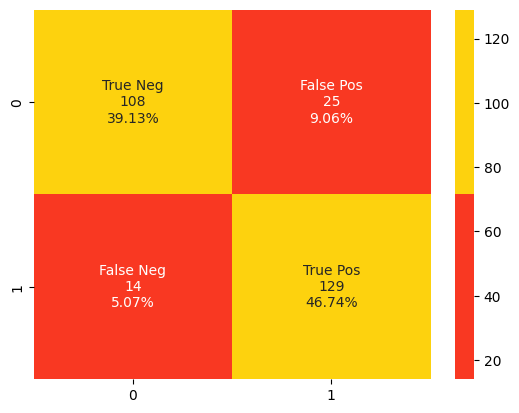

In [ ]:
model_evaluation(cat)

In [ ]:
from xgboost import XGBClassifier
class_xg = XGBClassifier(objective= 'binary:logistic')

In [ ]:
model(class_xg)

Accuracy :  83.33%
Cross Validation Score :  91.71%
ROC_AUC Score :  83.15%


              precision    recall  f1-score   support

           0       0.86      0.78      0.82       133
           1       0.81      0.88      0.85       143

    accuracy                           0.83       276
   macro avg       0.84      0.83      0.83       276
weighted avg       0.84      0.83      0.83       276



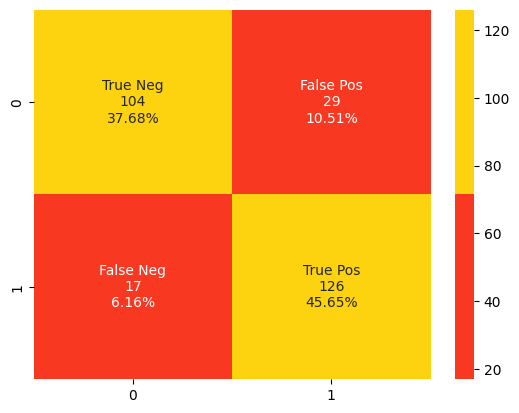

In [ ]:
model_evaluation(class_xg)

In [ ]:
nb = GaussianNB()

In [ ]:
model(nb)

Accuracy :  86.23%
Cross Validation Score :  91.48%
ROC_AUC Score :  86.16%


**ANN**

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.3, random_state=0)

In [ ]:
#ANN - TANH Activation
import keras
model3 = keras.Sequential(
    [
        keras.layers.Dense(units=9,activation="tanh", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="tanh"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights3 = model3.get_weights()

In [ ]:
learning_rate = 0.001

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history = model3.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 56ms/step - loss: 0.8538 - auc: 0.2772 - val_loss: 0.7893 - val_auc: 0.2702
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 0.8117 - auc: 0.3122 - val_loss: 0.7558 - val_auc: 0.3112
Epoch 3/500
7/7 [==============================] - 0s 11ms/step - loss: 0.7720 - auc: 0.3718 - val_loss: 0.7252 - val_auc: 0.3752
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7356 - auc: 0.4547 - val_loss: 0.6976 - val_auc: 0.4571
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 0.7054 - auc: 0.5419 - val_loss: 0.6720 - val_auc: 0.5582
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6751 - auc: 0.6433 - val_loss: 0.6482 - val_auc: 0.6608
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6485 - auc: 0.7285 - val_loss: 0.6262 - val_auc: 0.7432
Epoch 8/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6240 - auc: 0.789

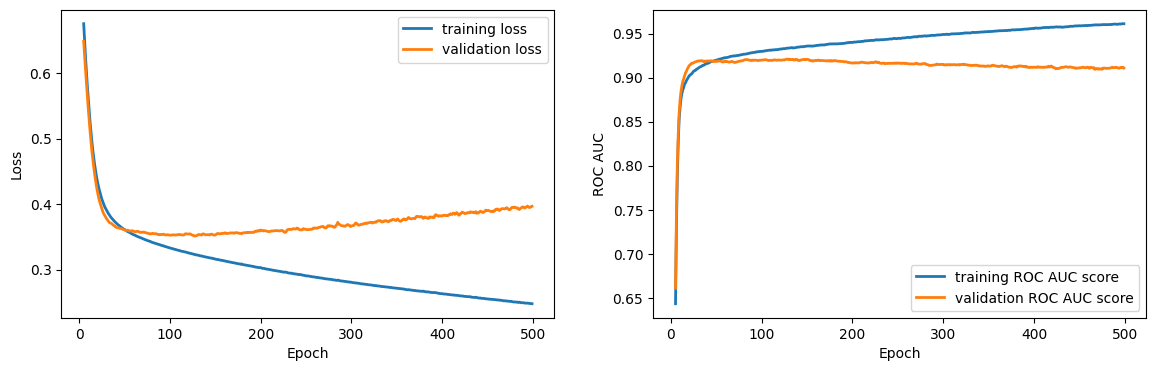

In [ ]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
t = np.concatenate((y_train,y_val),axis=0)

In [ ]:
predicted = model3.predict(np.concatenate((X_train,X_val),axis=0))
predicted = (predicted>0.5).astype(int)

29/29 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("accuracy: " + str(accuracy_score(t, predicted))+"\n")
print("precision: " + str(precision_score(t, predicted))+"\n")
print("recall score: " + str(recall_score(t, predicted))+"\n")
print("f1 score: " + str(f1_score(t, predicted))+"\n")

accuracy: 0.8845315904139434

precision: 0.8895348837209303

recall score: 0.9035433070866141

f1 score: 0.896484375



In [ ]:
#Sigmoid
import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
model2 = keras.Sequential(
    [
        keras.layers.Dense(units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros(),activation="sigmoid", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="sigmoid",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights2 = model2.get_weights()

In [ ]:
learning_rate = 0.001

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history2 = model2.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 45ms/step - loss: 0.8128 - auc_2: 0.4865 - val_loss: 0.8448 - val_auc_2: 0.5000
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7958 - auc_2: 0.5068 - val_loss: 0.8251 - val_auc_2: 0.5000
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7798 - auc_2: 0.5527 - val_loss: 0.8067 - val_auc_2: 0.5000
Epoch 4/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7661 - auc_2: 0.5493 - val_loss: 0.7892 - val_auc_2: 0.6551
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 0.7534 - auc_2: 0.4941 - val_loss: 0.7725 - val_auc_2: 0.7572
Epoch 6/500
7/7 [==============================] - 0s 10ms/step - loss: 0.7405 - auc_2: 0.6039 - val_loss: 0.7581 - val_auc_2: 0.7936
Epoch 7/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7298 - auc_2: 0.6583 - val_loss: 0.7448 - val_auc_2: 0.8169
Epoch 8/500
7/7 [==============================] - 0s 9ms/step - l

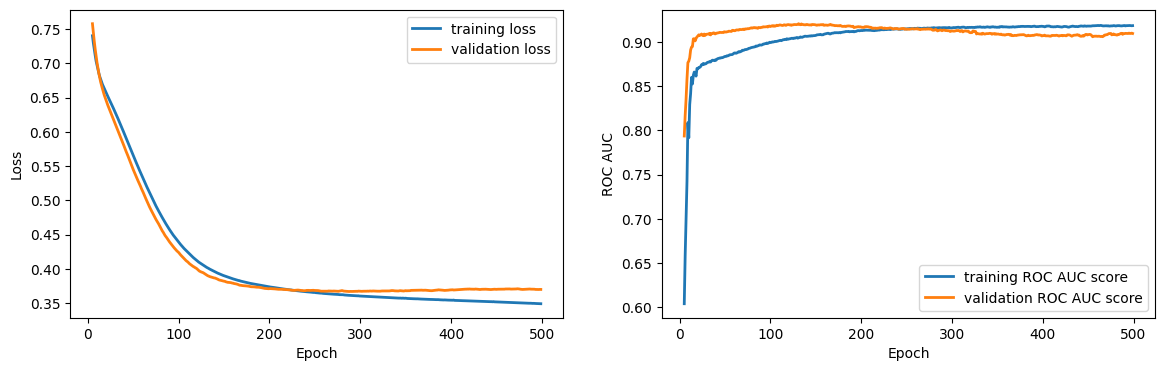

In [ ]:
logs = pd.DataFrame(history2.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_2"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_2"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
predicted2 = model2.predict(np.concatenate((X_train,X_val),axis=0))
predicted2 = (predicted2>0.5).astype(int)

29/29 [==============================] - 0s 1ms/step


In [ ]:
print("accuracy: " + str(accuracy_score(t, predicted2))+"\n")
print("precision: " + str(precision_score(t, predicted2))+"\n")
print("recall score: " + str(recall_score(t, predicted2))+"\n")
print("f1 score: " + str(f1_score(t, predicted2))+"\n")

accuracy: 0.8616557734204793

precision: 0.8628571428571429

recall score: 0.8917322834645669

f1 score: 0.8770571151984512



In [ ]:
#Relu Function
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros(),activation="relu", input_shape=(X_train.shape[-1],) ),
        keras.layers.Dense(units=9, activation="relu",kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

In [ ]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
              loss="binary_crossentropy",
              metrics=keras.metrics.AUC()
             )

In [ ]:
history3 = model.fit(X_train, y_train,
          epochs=500,
          batch_size=100, validation_data=(X_val, y_val),
          verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 48ms/step - loss: 0.6927 - auc_3: 0.5012 - val_loss: 0.6913 - val_auc_3: 0.8450
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6911 - auc_3: 0.7274 - val_loss: 0.6880 - val_auc_3: 0.8096
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6878 - auc_3: 0.8286 - val_loss: 0.6832 - val_auc_3: 0.8905
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6828 - auc_3: 0.8604 - val_loss: 0.6762 - val_auc_3: 0.8993
Epoch 5/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6760 - auc_3: 0.8655 - val_loss: 0.6671 - val_auc_3: 0.9015
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6670 - auc_3: 0.8702 - val_loss: 0.6561 - val_auc_3: 0.9055
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6563 - auc_3: 0.8713 - val_loss: 0.6426 - val_auc_3: 0.9069
Epoch 8/500
7/7 [==============================] - 0s 11ms/step 

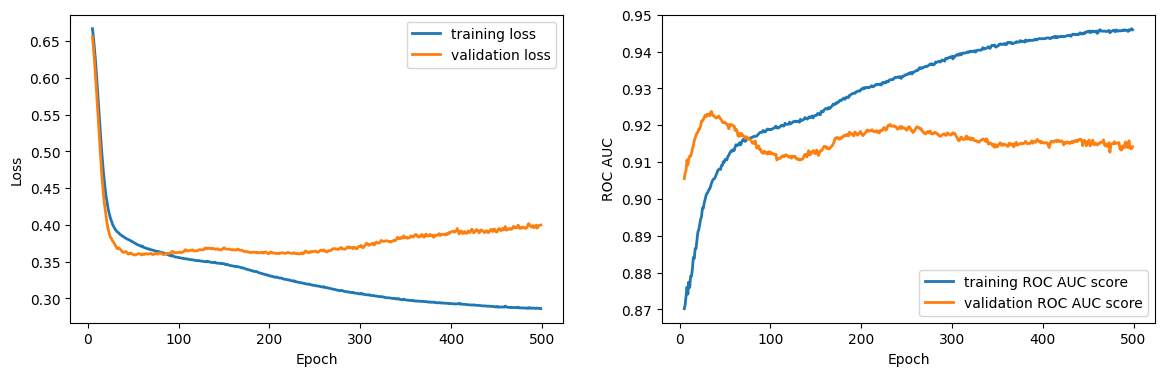

In [ ]:
logs = pd.DataFrame(history3.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc_3"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc_3"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [ ]:
predicted3 = model.predict(np.concatenate((X_train,X_val),axis=0))
predicted3 = (predicted3>0.5).astype(int)

29/29 [==============================] - 0s 2ms/step


In [ ]:
print("accuracy: " + str(accuracy_score(t, predicted3))+"\n")
print("precision: " + str(precision_score(t, predicted3))+"\n")
print("recall score: " + str(recall_score(t, predicted3))+"\n")
print("f1 score: " + str(f1_score(t, predicted3))+"\n")

accuracy: 0.8725490196078431

precision: 0.8654205607476636

recall score: 0.9114173228346457

f1 score: 0.8878235858101631

